<a href="https://colab.research.google.com/github/SlaterJoseph/Music-Analysis/blob/main/Data_Tools_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start Of Project

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

Some Dictionaries to make my life easier

In [ ]:
col_desc = {
    'Track': 'name of the song, as visible on the Spotify platform.',
    'Artist': 'name of the artist.',
    'Url_spotify': 'the Url of the artist.',
    'Album': 'the album in wich the song is contained on Spotify.',
    'Album_type': 'indicates if the song is relesead on Spotify as a single or contained in an album.',
    'Uri': 'a spotify link used to find the song through the API.',
    'Danceability': 'describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.',
    'Energy': 'is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.',
    'Key': 'the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.',
    'Loudness': 'the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.',
    'Speechiness': 'detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.',
    'Acousticness': 'a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.',
    'Instrumentalness': 'predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.',
    'Liveness': 'detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.',
    'Valence': 'a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).',
    'Tempo': 'the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.',
    'Duration_ms': 'the duration of the track in milliseconds.',
    'Stream': 'number of streams of the song on Spotify.',
    'Url_youtube': 'url of the video linked to the song on Youtube, if it have any.',
    'Title': 'title of the videoclip on youtube.',
    'Channel': 'name of the channel that have published the video.',
    'Views': 'number of views.',
    'Likes': 'number of likes.',
    'Comments': 'number of comments.',
    'Description': 'description of the video on Youtube.',
    'Licensed': 'Indicates whether the video represents licensed content, which means that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner.',
    'official_video': 'boolean value that indicates if the video found is the official video of the song.'
}

In [ ]:
pitch_mapping = {
    0: 'C',
    1: 'C♯/D♭',
    2: 'D',
    3: 'D♯/E♭',
    4: 'E',
    5: 'F',
    6: 'F♯/G♭',
    7: 'G',
    8: 'G♯/A♭',
    9: 'A',
    10: 'A♯/B♭',
    11: 'B'
}

Basic Analysis of 1st CSV

In [ ]:
df = pd.read_csv('/content/Spotify_Youtube.csv')
df

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [ ]:
df.columns

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [ ]:
df.dtypes

Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

In [ ]:
df.loc[1]

Artist                                                       Gorillaz
Url_spotify         https://open.spotify.com/artist/3AA28KZvwAUcZu...
Track                                                 Rhinestone Eyes
Album                                                   Plastic Beach
Album_type                                                      album
Uri                              spotify:track:1foMv2HQwfQ2vntFf9HFeG
Danceability                                                    0.676
Energy                                                          0.703
Key                                                               8.0
Loudness                                                       -5.815
Speechiness                                                    0.0302
Acousticness                                                   0.0869
Instrumentalness                                             0.000687
Liveness                                                       0.0463
Valence             

In [ ]:
# Remove categories which seem useless
df = df.drop(['Title', 'Url_youtube', 'Url_spotify', 'Uri', 'Channel', 'Description', 'official_video', 'Liveness'], axis=1)
df

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.7720,138.559,222640.0,693555221.0,6220896.0,169907.0,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.8520,92.761,200173.0,72011645.0,1079128.0,31003.0,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.5510,108.014,215150.0,8435055.0,282142.0,7399.0,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.5780,120.423,233867.0,211754952.0,1788577.0,55229.0,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.5250,167.953,340920.0,618480958.0,6197318.0,155930.0,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.6580,90.002,94667.0,71678.0,1113.0,0.0,True,9.227144e+06
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.6570,174.869,150857.0,164741.0,2019.0,0.0,True,1.089818e+07
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.4190,168.388,136842.0,35646.0,329.0,0.0,True,6.226110e+06
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.5390,155.378,108387.0,6533.0,88.0,0.0,True,6.873961e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Valence           20716 non-null  float64
 12  Tempo             20716 non-null  float64
 13  Duration_ms       20716 non-null  float64
 14  Views             20248 non-null  float64
 15  Likes             20177 non-null  float64
 16  Comments          20149 non-null  float6

In [ ]:
# Drop all rows with null values. Around 1,000 of 21,000 are lost
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19549 entries, 0 to 20717
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19549 non-null  object 
 1   Track             19549 non-null  object 
 2   Album             19549 non-null  object 
 3   Album_type        19549 non-null  object 
 4   Danceability      19549 non-null  float64
 5   Energy            19549 non-null  float64
 6   Key               19549 non-null  float64
 7   Loudness          19549 non-null  float64
 8   Speechiness       19549 non-null  float64
 9   Acousticness      19549 non-null  float64
 10  Instrumentalness  19549 non-null  float64
 11  Valence           19549 non-null  float64
 12  Tempo             19549 non-null  float64
 13  Duration_ms       19549 non-null  float64
 14  Views             19549 non-null  float64
 15  Likes             19549 non-null  float64
 16  Comments          19549 non-null  float6

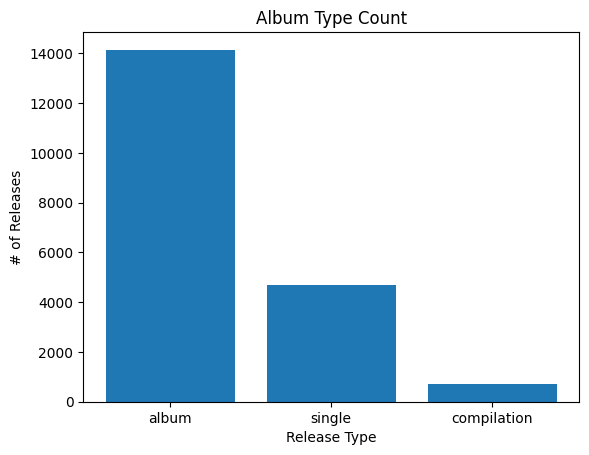

In [ ]:
album_type_count = df['Album_type'].value_counts()

plt.bar(album_type_count.index, album_type_count.values)

plt.xlabel('Release Type')
plt.ylabel('# of Releases')
plt.title('Album Type Count')
plt.show()

<ipython-input-119-b238fb1815ab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.drop(['Views', 'Likes', 'Comments', 'Stream'], axis=1).corr()


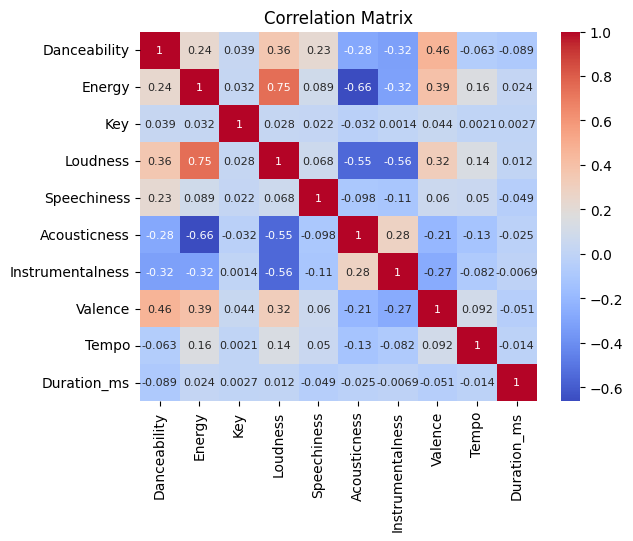

<Figure size 2000x2000 with 0 Axes>

In [ ]:
corr_matrix = df.drop(['Views', 'Likes', 'Comments', 'Stream'], axis=1).corr()
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.figure(figsize=(20,20))
plt.show()

Notable Correlations
- Energy - Loudness
- Energy - Acoustics
- Loudness - Acoustics
- Loudness - Instrumentless
- Danceability - Valence
- Valence - Energy
- Loudness - Valence

Messing with last.fm API

Key - 7fa30f3952fa576284c74fbb19cd694f

Shared Secret - e676d48ac04793e9cf93c3b087304edf

In [ ]:
import requests, json

In [ ]:
df.loc[0]

Artist                    Gorillaz
Track               Feel Good Inc.
Album                   Demon Days
Album_type                   album
Danceability                 0.818
Energy                       0.705
Key                            6.0
Loudness                    -6.679
Speechiness                  0.177
Acousticness               0.00836
Instrumentalness           0.00233
Valence                      0.772
Tempo                      138.559
Duration_ms               222640.0
Views                  693555221.0
Likes                    6220896.0
Comments                  169907.0
Licensed                      True
Stream                1040234854.0
Name: 0, dtype: object

In [ ]:
# Test for getting 3 most popular tags (using in place of genres cause spotify api confused me)

url = 'http://ws.audioscrobbler.com/2.0/'
params = {
    'method': 'track.gettoptags',
    'artist': 'gorillaz',
    'track': 'Feel Good Inc',
    'api_key': '7fa30f3952fa576284c74fbb19cd694f',
    'format': 'json'
}

response = requests.get(url, params=params)

count = 0
tag_list = list()
if response.status_code == 200:
    data = response.json()
    tags = data['toptags']['tag']
    for tag in tags:
      tag_list.append(tag['name'])
      count += 1

      if count == 3:
        break

response.json()

In [ ]:
def get_tags(artists, tracks):
  url = 'http://ws.audioscrobbler.com/2.0/'
  tag_lists = [list(), list(), list()]

  for artist, track in zip(artists, tracks):
    params = {
        'method': 'track.gettoptags',
        'artist': artist,
        'track': track,
        'api_key': '7fa30f3952fa576284c74fbb19cd694f',
        'format': 'json'
    }

    # print(params['artist'], params['track'])
    response = requests.get(url, params=params)

    count = 0
    if response.status_code == 200:
        data = response.json()
        if 'toptags' in data:
          tags = data['toptags']['tag']

        for tag in tags:
          tag_lists[count].append(tag['name'].upper())
          count += 1

          if count == 3:
            break

        if count < 3:
          while count < 3:
            tag_lists[count].append(None)
            count += 1

    else:
      print(response.status_code)
      for tag in tag_lists:
        tag.append(None)


  return pd.DataFrame({'Tag 1': tag_lists[0], 'Tag 2': tag_lists[1], 'Tag 3': tag_lists[2]})

In [ ]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes',
       'Comments', 'Licensed', 'Stream'],
      dtype='object')

In [ ]:
artists, tracks = df['Artist'].tolist(), df['Track'].tolist()
tag_df = get_tags(artists, tracks)

In [ ]:
tag_df

,Tag 1,Tag 2,Tag 3
0,ALTERNATIVE,ELECTRONIC,HIP-HOP
1,ELECTRONIC,ALTERNATIVE,HIP-HOP
2,ELECTROPOP,PSYCHEDELIC POP,SYNTHPOP
3,ELECTRONIC,ALTERNATIVE,POP
4,ALTERNATIVE,ELECTRONIC,HIP-HOP
...,...,...,...
19544,ROCK,CLASSIC ROCK,DANCE
19545,ROCK,CLASSIC ROCK,DANCE
19546,ROCK,CLASSIC ROCK,DANCE
19547,ROCK,CLASSIC ROCK,DANCE


In [ ]:
tag_df.columns

Index(['Tag 1', 'Tag 2', 'Tag 3'], dtype='object')

In [ ]:
tag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19549 entries, 0 to 19548
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tag 1   18992 non-null  object
 1   Tag 2   18890 non-null  object
 2   Tag 3   18794 non-null  object
dtypes: object(3)
memory usage: 458.3+ KB


In [ ]:
# Successfuly created a tag dataframe with the same size as the base dataframe
len(df), len(tag_df)

In [ ]:
# Preprocess the tag_df
tag_df['Tag 1'].value_counts()

In [ ]:
for tag, count in tag_df['Tag 1'].value_counts().items():
  print(f'{tag}, count')

NameError: ignored

# THE API DID NOT WORK. TRYING TO WEBSCRAPE

### Wikipedia Web Scrape Attempt

In [ ]:
import requests
from bs4 import BeautifulSoup

# Function for getting 1st genre associated with a song
def scrape_genre(song):
    url = f"https://en.wikipedia.org/wiki/{song}"
    response = requests.get(url)
    if response.status_code == 200:
        html = response.content
        soup = BeautifulSoup(html, 'html.parser')

        table = soup.find('table', class_='infobox')
        if table:
            rows = table.find_all('tr')
            for row in rows:
                th = row.find('th', class_='infobox-label')
                if th and th.text.strip() == 'Genre':
                    genre_list = row.find('ul')
                    if genre_list:
                        first_genre = genre_list.find('li')
                        if first_genre:
                            genre = first_genre.text.strip()
                            return genre



    return None

In [ ]:
import re

# Function for cleaning up genre  & input
def remove_square_brackets(text):
    pattern = r"\[[^\]]+\]"
    return re.sub(pattern, "", text)

def remove_parentheses(text):
    pattern = r"\([^)]*\)"
    return re.sub(pattern, "", text)

In [ ]:
print(df['Track'].tolist())

['Feel Good Inc.', 'Rhinestone Eyes', 'New Gold (feat. Tame Impala and Bootie Brown)', 'On Melancholy Hill', 'Clint Eastwood', 'DARE', 'New Gold (feat. Tame Impala and Bootie Brown) - Dom Dolla Remix', "She's My Collar (feat. Kali Uchis)", 'Cracker Island (feat. Thundercat)', 'Dirty Harry', 'Californication', 'Under the Bridge', "Can't Stop", 'Scar Tissue', 'Otherside', 'Snow (Hey Oh)', 'Dani California', 'By the Way', 'Give It Away', 'Dark Necessities', 'In Da Club', 'Candy Shop', 'Just A Lil Bit', 'P.I.M.P.', 'Many Men (Wish Death)', 'Disco Inferno', '21 Questions', "Is This Love ('09) (feat. 50 Cent)", "If I Can't", 'Best Friend - Remix', 'Whiskey In The Jar', 'Lux Æterna', 'Screaming Suicide', 'Yellow', 'Viva La Vida', 'Sparks', 'Something Just Like This', 'The Scientist', 'A Sky Full of Stars', 'Paradise', 'Hymn for the Weekend', 'My Universe', 'Fix You', 'Get Lucky (feat. Pharrell Williams & Nile Rodgers) - Radio Edit', 'One More Time', 'Instant Crush (feat. Julian Casablancas)',

In [ ]:
tracks = df['Track'].tolist()
new_tracks = list()
new_song_tracks = list()

for track in tracks:
  track = track.strip()
  new_track = track.replace(' ', '_')
  newer_track = remove_parentheses(new_track)

  new_tracks.append(newer_track)
  new_song_tracks.append(newer_track + '_(song)')

NameError: ignored

In [ ]:
genre_list = list()
none_list = list()
counter = 0
overall = 0

for song_1, song_2 in zip(new_tracks, new_song_tracks):
  genre = scrape_genre(song_1)

  if genre == None:
    genre = scrape_genre(song_2)

  if genre == None:
    none_list.append(song_1)

  genre_list.append(genre)

  if genre:
    counter += 1
  overall += 1
  print(f'{counter} : {overall}')

genre_list

In [ ]:
# Saving the web scraping
def create_text_file(data, filename):
    with open(filename, 'w') as file:
        for item in data:
            file.write(f"{item}\n")

create_text_file(genre_list, 'genres.txt')

In [ ]:
clean_genre = list()
for genre in genre_list:
  cleaned = None

  if genre:
    cleaned = remove_square_brackets(genre)

  clean_genre.append(cleaned)

clean_genre

In [ ]:
genre_series = pd.Series(clean_genre)
(genre_series.value_counts() >= 10)

Hip hop                 True
Pop                     True
R&B                     True
Alternative rock        True
Pop rock                True
                       ...  
Neue Deutsche Härte    False
Miami                  False
Garage rock revival    False
Tropipop               False
Ballad                 False
Length: 324, dtype: bool

The genre dataframe is missing a lot but it should suffice for some basic clustering later on.

In [ ]:
genres = list()

with open('genres.txt', 'r') as file:
  for line in file:
    line = line.rstrip('\n')
    genre = remove_square_brackets(line)
    genres.append(genre)


genres

In [ ]:
genre_types = {
    'rock',
    'pop',
    'alternative',
    'hip',
    'rap',
    'R&B',
    'metal',
    'blues',
    'country',
    'grundge',
    'electronic'
    'edm',
    'jazz',

}

genre_series = pd.Series(genres)
genre_1, genre_2 = list(), list()
for name, count in genre_series.value_counts().sort_values(ascending=False).items():
  if name == None:
    genre_1.append(None)
    genre_2.append(None)

  name.lower()
  words = name.split(' -')

  genre_1_filled = False
  genre_2_filled = False
  print(words)
  for word in words:


    if word in genre_types:
      if word == 'edm':
        genre = 'electronic'
      elif word == 'grundge' or word == 'metal':
        genre = 'rock'
      elif word == 'hip':
        genre = 'rap'

    if genre_1_filled:
      genre_2.append(genre)
    else:
      genre_1.append(genre)

  if not genre_1_filled:
    genre_1.append(None)

  if not genre_2_filled:
    genre_2.append(None)

genre_df = pd.DataFrame([genre_1, genre_2])
genre_df

['None']
['Hip hop']
['Pop']
['R&B']
['Alternative rock']
['Pop rock']
['Latin pop']
['Hard rock']
['Dance-pop']
['Indie rock']
['Rock']
['Synth-pop']
['Reggaeton']
['Country']
['Electropop']
['Soul']
['West Coast hip hop']
['Alternative metal']
['Disco']
['Pop punk']
['Soft rock']
['New wave']
['Dance']
['Folk rock']
['Nu metal']
['Heavy metal']
['Indie pop']
['Alternative hip hop']
['Trap']
['Punk rock']
['EDM']
['Christmas']
['Country pop']
['Blues rock']
['Indie folk']
['Psychedelic rock']
['K-pop']
['Pop rap']
['Glam metal']
['East Coast hip hop']
['Bachata']
['Progressive rock']
['Rock and roll']
['Electronic']
['Post-grunge']
['Funk']
['Doo-wop']
['Alternative pop']
['Alternative R&B']
['Southern rock']
['Dream pop']
['House']
['Folk']
['Gangsta rap']
['Garage rock']
['Groove metal']
['Electronica']
['Rap rock']
['Metalcore']
['Ambient']
['Hardcore hip hop']
['Grunge']
['Dancehall']
['Psychedelic pop']
['Cumbia']
['Country rock']
['Pop-rap']
['Latin trap']
['Filmi']
['Conscious 

,0,1,2,3,4,5,6,7,8,9,...,640,641,642,643,644,645,646,647,648,649
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


# Analysis 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19549 entries, 0 to 20717
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19549 non-null  object 
 1   Track             19549 non-null  object 
 2   Album             19549 non-null  object 
 3   Album_type        19549 non-null  object 
 4   Danceability      19549 non-null  float64
 5   Energy            19549 non-null  float64
 6   Key               19549 non-null  float64
 7   Loudness          19549 non-null  float64
 8   Speechiness       19549 non-null  float64
 9   Acousticness      19549 non-null  float64
 10  Instrumentalness  19549 non-null  float64
 11  Valence           19549 non-null  float64
 12  Tempo             19549 non-null  float64
 13  Duration_ms       19549 non-null  float64
 14  Views             19549 non-null  float64
 15  Likes             19549 non-null  float64
 16  Comments          19549 non-null  float6

In [ ]:
from sklearn.cluster import KMeans
import scipy.stats as stats

Text(0, 0.5, 'Loudness')

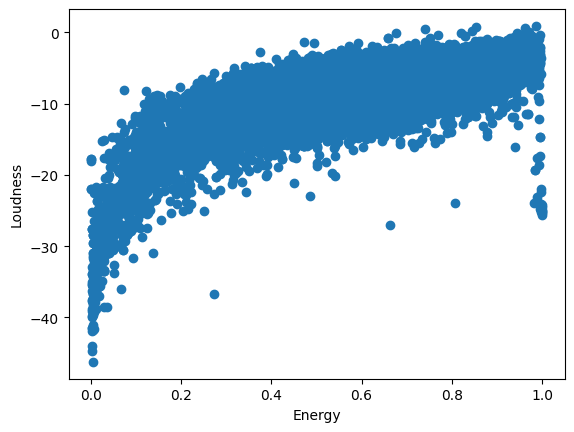

In [ ]:
plt.scatter(df['Energy'], df['Loudness'])
plt.xlabel('Energy')
plt.ylabel('Loudness')

In [ ]:
len(df['Loudness']), len(df['Energy'])

(19549, 19549)

In [ ]:
correlation, p_value = stats.pearsonr(df['Energy'], df['Loudness'])
correlation, p_value

(0.7453365423186518, 0.0)

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Energy'], df['Loudness'])
slope, intercept, r_value, p_value, std_err

(16.12042561384387,
 -17.872389533677154,
 0.7453365423186517,
 0.0,
 0.10313520582929464)

#### Energy and Loudness have a significant positive relationship

In [ ]:
intense = ['Energy', 'Loudness']
df['Intensity'] = df[intense].mean(axis=1)
df['Intensity']

0       -2.9870
1       -2.5560
2       -1.5035
3       -2.5355
4       -3.9665
          ...  
20713   -2.7090
20714   -0.4250
20715   -1.9245
20716   -1.6185
20717   -1.8025
Name: Intensity, Length: 19549, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19549 entries, 0 to 20717
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19549 non-null  object 
 1   Track             19549 non-null  object 
 2   Album             19549 non-null  object 
 3   Album_type        19549 non-null  object 
 4   Danceability      19549 non-null  float64
 5   Energy            19549 non-null  float64
 6   Key               19549 non-null  float64
 7   Loudness          19549 non-null  float64
 8   Speechiness       19549 non-null  float64
 9   Acousticness      19549 non-null  float64
 10  Instrumentalness  19549 non-null  float64
 11  Valence           19549 non-null  float64
 12  Tempo             19549 non-null  float64
 13  Duration_ms       19549 non-null  float64
 14  Views             19549 non-null  float64
 15  Likes             19549 non-null  float64
 16  Comments          19549 non-null  float6

IndexError: ignored

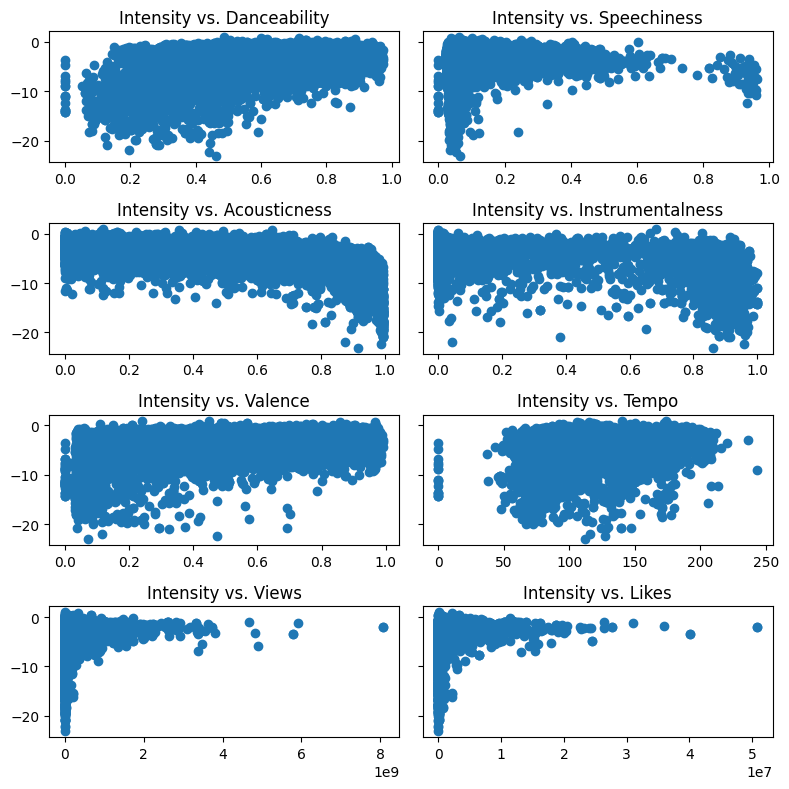

In [ ]:
columns_interest = ['Danceability', 'Speechiness', 'Acousticness', 'Instrumentalness',
                    'Valence', 'Tempo', 'Views', 'Likes', 'Stream']

num_rows = len(columns_interest) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 8), sharey=True, tight_layout=True)

fig.subplots_adjust(hspace=0.5, wspace=0.3)

if isinstance(axs, np.ndarray):
  axs = axs.flatten()

for i, column in enumerate(columns_interest):
  ax = axs[i]
  ax.scatter(df[column], df['Intensity'])
  ax.set_title(f'Intensity vs. {column}')

plt.tight_layout()
plt.show()

In [ ]:
col_analyze = ['Danceability', 'Acousticness', 'Instrumentalness', 'Valence']

for col in col_analyze:
  correlation, p_value = stats.pearsonr(df['Intensity'], df[col])
  print(f'{col}: {correlation}, {p_value}')

Danceability: 0.35620770818933895, 0.0
Acousticness: -0.563709085679198, 0.0
Instrumentalness: -0.5515435303791801, 0.0
Valence: 0.32281406575513627, 0.0


In [ ]:
print(col_desc['Acousticness'])
print(col_desc['Instrumentalness'])

a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


In [ ]:
print(col_desc['Loudness'])
print(col_desc['Energy'])

the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


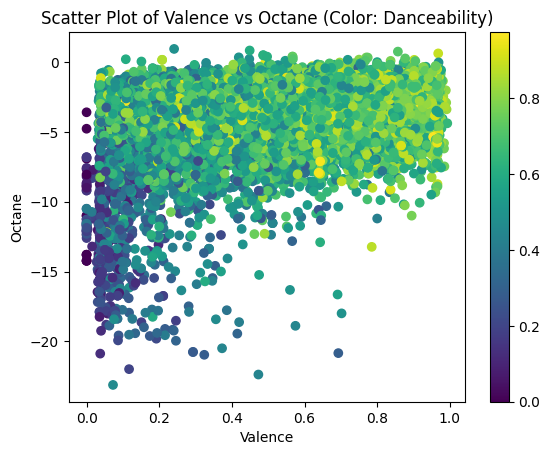

In [ ]:
x = df['Valence']
z = df['Danceability']
y = df['Octane']

plt.scatter(x, y, c=z, cmap='viridis')
plt.colorbar()

plt.xlabel('Valence')
plt.ylabel('Octane')
plt.title('Scatter Plot of Valence vs Octane (Color: Danceability)')

plt.show()

Text(0, 0.5, 'Tempo')

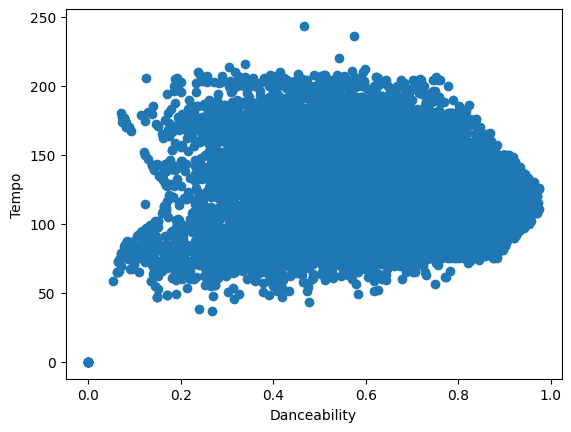

In [ ]:
plt.scatter(df['Danceability'], df['Tempo'])
plt.xlabel('Danceability')
plt.ylabel('Tempo')

In [ ]:
correlation, p_value = stats.pearsonr(df['Danceability'], df['Tempo'])
correlation, p_value

(-0.06316245248401192, 9.615379664261883e-19)

Text(0, 0.5, 'Octane')

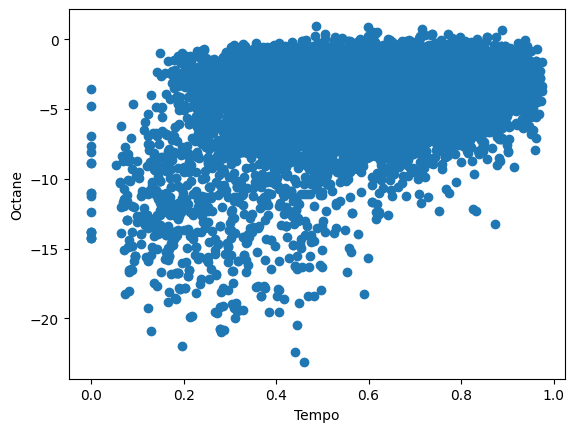

In [ ]:
plt.scatter(df['Danceability'], df['Octane'])
plt.xlabel('Tempo')
plt.ylabel('Octane')

In [ ]:
correlation, p_value = stats.pearsonr(df['Danceability'], df['Octane'])
correlation, p_value

(0.35620770818933895, 0.0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19549 entries, 0 to 20717
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19549 non-null  object 
 1   Track             19549 non-null  object 
 2   Album             19549 non-null  object 
 3   Album_type        19549 non-null  object 
 4   Danceability      19549 non-null  float64
 5   Energy            19549 non-null  float64
 6   Key               19549 non-null  float64
 7   Loudness          19549 non-null  float64
 8   Speechiness       19549 non-null  float64
 9   Acousticness      19549 non-null  float64
 10  Instrumentalness  19549 non-null  float64
 11  Valence           19549 non-null  float64
 12  Tempo             19549 non-null  float64
 13  Duration_ms       19549 non-null  float64
 14  Views             19549 non-null  float64
 15  Likes             19549 non-null  float64
 16  Comments          19549 non-null  float6

In [ ]:
df['Speechiness']

0        0.1770
1        0.0302
2        0.0522
3        0.0260
4        0.1710
          ...  
20713    0.0328
20714    0.1370
20715    0.0647
20716    0.4190
20717    0.1070
Name: Speechiness, Length: 19549, dtype: float64

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 3

selected_columns = ['Valence', 'Dancebility', 'Tempo']

# Extract the data from selected columns
data = df[selected_columns].values

# Perform k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = labels